### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

## sample map of 1 year of limitation 

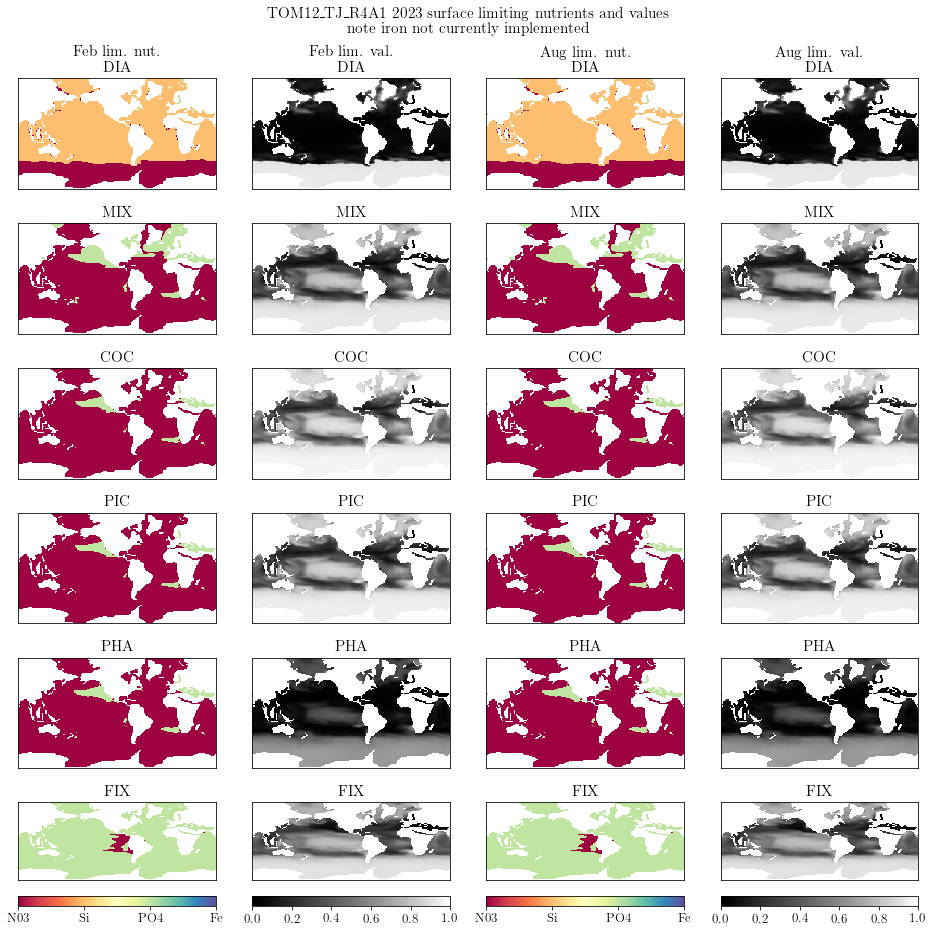

In [4]:
tdir = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/'
mod = 'TOM12_TJ_R4A1'
year = 2023
#DIA MIX COC PIC	PHA	FIX	
pft = 'DIA'
tp = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']	
inds = [1,7,1,7]
tmi = [1,0,1,0]
tma = [4,1,4,1]

pv = ['limitNut','limitVal','limitNut','limitVal']
tda = ['Feb','Feb','Aug','Aug']
tvi = ['nut.','val.','nut.','val.']

cmaps = [plt.cm.Spectral, cm.gray, plt.cm.Spectral, cm.gray]

fact = 1.1
fig, axs = plt.subplots(6,4, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

i2 = 0
for t in range(0,6):
    pft = tp[t]
    w = xr.open_dataset(f'{tdir}/{mod}_y{year}_{pft}_LoP_d0-0.nc')
    
    for x in range(0,4):
        tcmap = cmaps[x]
        tplt = pv[x]
        tind = inds[x]
        mk = (w[tplt][tind,0,:,:].values)
        q = np.where(mk == 0)
        mk[q] = np.nan
        vv = axs[i2].pcolormesh(mk, cmap = tcmap, vmin = tmi[x], vmax = tma[x])
        if t == 0:
            ttit = f'{tda[x]} lim. {tvi[x]} \n {pft}'
        else:
            ttit = f'{pft}'
            
        axs[i2].set_title(ttit)
        
        if i2 >=20:
            cbar = plt.colorbar(vv, ax = axs[i2], orientation='horizontal')
        if ((i2 == 22) | (i2 == 20)):
            cbar.set_ticks([1,2,3,4])
            cbar.set_ticklabels(['N03','Si','PO4','Fe',])

        i2 = i2+1
        
        
        
        
        
for i in range(0,24):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
plt.suptitle(f'{mod} {year} surface limiting nutrients and values \n note iron not currently implemented')
plt.tight_layout()

## timeseries?

In [5]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]

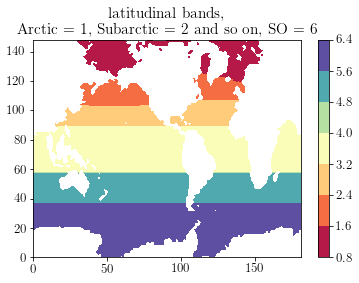

In [6]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan


plt.figure()
mask_latbands = np.copy(maskno)

mask_latbands[maskno == 0.5] = 1
mask_latbands[(maskno == 1) | (maskno == 2.4)] = 2
mask_latbands[(maskno == 1.2) | (maskno == 2.6)] = 3
mask_latbands[(maskno == 1.4) | (maskno == 2.8) | (maskno == 3.6)] = 4
mask_latbands[(maskno == 1.6) | (maskno == 3.0) | (maskno == 3.8)] = 5
mask_latbands[(maskno == 1.8) | (maskno == 3.2) | (maskno == 4.0)] = 6
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
w = plt.contourf(mask_latbands, vmin = 1, vmax = 6, cmap = cmap)
plt.title('latitudinal bands, \n Arctic = 1, Subarctic = 2 and so on, SO = 6')
plt.colorbar(w)

In [7]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]
cvol_sm = cvol[0:10,:,:].values
cvol_size = np.zeros([1,31,149,182])
cvol_size[0,:,:,:] = cvol

tmesh['cvol'] = tmesh['tmask'].copy()
tmesh['cvol'].data = cvol_size

tmesh_rn = tmesh.rename({"z": "deptht"})
print(tmesh_rn)

<xarray.Dataset>
Dimensions:       (deptht: 31, t: 1, x: 182, y: 149)
Dimensions without coordinates: deptht, t, x, y
Data variables: (12/46)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (deptht) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, deptht, y, x) int8 ...
    umask         (t, deptht, y, x) int8 ...
    ...            ...
    gdept_1d      (t, deptht) float64 ...
    gdepw_1d      (t, deptht) float64 ...
    e3t_1d        (t, deptht) float64 ...
    e3w_1d        (t, deptht) float64 ...
    csize         (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    cvol          (t, deptht, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  28/02/2019 15:51:26 +0000


In [8]:
A = np.array([0, 1, 1, 0, 1])
B = np.array([5, 6, 7, 8, 9])

# Sum elements of B where elements of A are equal to 1
sum_B = B[A == 1].sum()

In [14]:
ex = False

tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]
cvol_sm = cvol[0:10,:,:].values

def get_perc(mr,yr,pft):
    
    w = xr.open_dataset(f'./data/{mr}_y{yr}_{pft}_LoP_d0-9.nc')

    no3_ar = np.zeros(12)
    si_ar = np.zeros(12)
    p_ar = np.zeros(12)
    fe_ar = np.zeros(12)

    for i in range(0,12):
        test = w.limitNut[i,0:10,:,:].values

        no3_ar[i] = cvol_sm[test == 1].sum()/cvol_sm.sum()
        si_ar[i] = cvol_sm[test == 2].sum()/cvol_sm.sum()
        p_ar[i] = cvol_sm[test == 3].sum()/cvol_sm.sum()
        fe_ar[i] = cvol_sm[test == 4].sum()/cvol_sm.sum()

    times = pd.date_range(f"{yr}/01/01",f"{yr+1}/01/01",freq='MS',closed='left')

    savenam = f'./data/{mr}_y{yr}_{pft}_LoP_d0-9-perc.nc'
    data_vars = {'no3':(['time_counter'], no3_ar),\
                 'si':(['time_counter'], si_ar),\
                'po4':(['time_counter'], p_ar),\
                 'fe':(['time_counter'], fe_ar),
    }
    # define coordinates
    coords = {'time_counter': (['time_counter'], times)}
    # define global attributes
    attrs = {'made in':'LimitsOfPhytoplankton/sampleMaps.ipynb',
    'desc': 'yearly medusa files, saving only variables of interest'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)

if ex:
    
    mr = 'TOM12_TJ_CA02'
    for i in range(1950,2100):
        print(i)
        try:
            get_perc(mr,i,'FIX')
        except:
            print(f'no {i} FIX')
        try:
            get_perc(mr,i,'MIX')
        except:
            print(f'no {i} MIX')
        try:
            get_perc(mr,i,'DIA')
        except:
            print(f'no {i} DIA')

    mr = 'TOM12_TJ_EA02'
    for i in range(1950,2100):
        print(i)
        try:
            get_perc(mr,i,'FIX')
        except:
            print(f'no {i} FIX')
        try:
            get_perc(mr,i,'MIX')
        except:
            print(f'no {i} MIX')
        try:
            get_perc(mr,i,'DIA')
        except:
            print(f'no {i} DIA')

In [12]:
def make_yearlist(yrst, yrend, pft, mr = 'TOM12_TJ_CA02'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'./data/{mr}_y{yrs[i]}_{pft}_LoP_d0-9-perc.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

fix_CA02 = xr.open_mfdataset(make_yearlist(1950, 2099, 'FIX'))
mix_CA02 = xr.open_mfdataset(make_yearlist(1950, 2099, 'MIX'))
dia_CA02 = xr.open_mfdataset(make_yearlist(1950, 2099, 'DIA'))

fix_EA02 = xr.open_mfdataset(make_yearlist(1950, 2099, 'FIX',mr = 'TOM12_TJ_EA02'))
mix_EA02 = xr.open_mfdataset(make_yearlist(1950, 2099, 'MIX',mr = 'TOM12_TJ_EA02'))
dia_EA02 = xr.open_mfdataset(make_yearlist(1950, 2099, 'DIA',mr = 'TOM12_TJ_EA02'))

In [ ]:
dia

In [ ]:
dia.si.groupby('time_counter.year').mean()

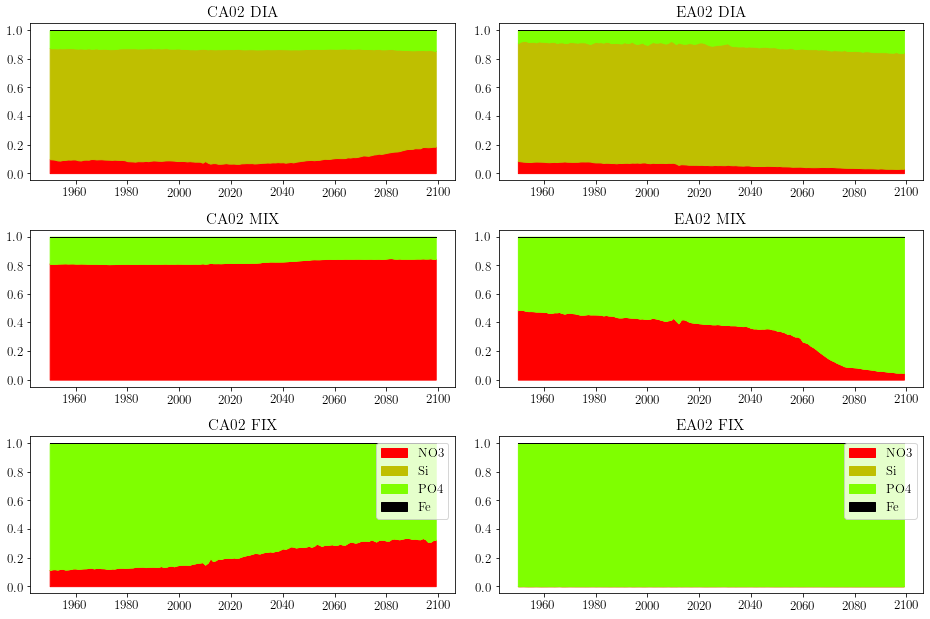

In [16]:
fact = 1.1
fig, axs = plt.subplots(3,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


yr =  dia_CA02.si.groupby('time_counter.year').mean().year
no3 = dia_CA02.no3.groupby('time_counter.year').mean().values
po4 = dia_CA02.po4.groupby('time_counter.year').mean().values
fe = dia_CA02.fe.groupby('time_counter.year').mean().values
si = dia_CA02.si.groupby('time_counter.year').mean().values

axs[0].fill_between(yr, np.zeros_like(no3), no3, color = 'r', label = 'NO3')    
axs[0].fill_between(yr, no3+si, no3, color = 'y', label = 'Si')    
axs[0].fill_between(yr, no3+si+po4, no3+si, color = 'chartreuse', label = 'PO4')    
axs[0].fill_between(yr, no3+si+po4+fe, no3+si+po4, color = 'k', label = 'Fe')

yr =  mix_CA02.si.groupby('time_counter.year').mean().year
no3 = mix_CA02.no3.groupby('time_counter.year').mean().values
po4 = mix_CA02.po4.groupby('time_counter.year').mean().values
fe = mix_CA02.fe.groupby('time_counter.year').mean().values
si = mix_CA02.si.groupby('time_counter.year').mean().values

axs[2].fill_between(yr, np.zeros_like(no3), no3, color = 'r', label = 'NO3')    
axs[2].fill_between(yr, no3+si, no3, color = 'y', label = 'Si')    
axs[2].fill_between(yr, no3+si+po4, no3+si, color = 'chartreuse', label = 'PO4')    
axs[2].fill_between(yr, no3+si+po4+fe, no3+si+po4, color = 'k', label = 'Fe')    

yr =  fix_CA02.si.groupby('time_counter.year').mean().year
no3 = fix_CA02.no3.groupby('time_counter.year').mean().values
po4 = fix_CA02.po4.groupby('time_counter.year').mean().values
fe = fix_CA02.fe.groupby('time_counter.year').mean().values
si = fix_CA02.si.groupby('time_counter.year').mean().values

axs[4].fill_between(yr, np.zeros_like(no3), no3, color = 'r', label = 'NO3')    
axs[4].fill_between(yr, no3+si, no3, color = 'y', label = 'Si')    
axs[4].fill_between(yr, no3+si+po4, no3+si, color = 'chartreuse', label = 'PO4')    
axs[4].fill_between(yr, no3+si+po4+fe, no3+si+po4, color = 'k', label = 'Fe')    

axs[4].legend(loc = 'best')

#######
yr =  dia_EA02.si.groupby('time_counter.year').mean().year
no3 = dia_EA02.no3.groupby('time_counter.year').mean().values
po4 = dia_EA02.po4.groupby('time_counter.year').mean().values
fe = dia_EA02.fe.groupby('time_counter.year').mean().values
si = dia_EA02.si.groupby('time_counter.year').mean().values

axs[0+1].fill_between(yr, np.zeros_like(no3), no3, color = 'r', label = 'NO3')    
axs[0+1].fill_between(yr, no3+si, no3, color = 'y', label = 'Si')    
axs[0+1].fill_between(yr, no3+si+po4, no3+si, color = 'chartreuse', label = 'PO4')    
axs[0+1].fill_between(yr, no3+si+po4+fe, no3+si+po4, color = 'k', label = 'Fe')

yr =  mix_EA02.si.groupby('time_counter.year').mean().year
no3 = mix_EA02.no3.groupby('time_counter.year').mean().values
po4 = mix_EA02.po4.groupby('time_counter.year').mean().values
fe = mix_EA02.fe.groupby('time_counter.year').mean().values
si = mix_EA02.si.groupby('time_counter.year').mean().values

axs[2+1].fill_between(yr, np.zeros_like(no3), no3, color = 'r', label = 'NO3')    
axs[2+1].fill_between(yr, no3+si, no3, color = 'y', label = 'Si')    
axs[2+1].fill_between(yr, no3+si+po4, no3+si, color = 'chartreuse', label = 'PO4')    
axs[2+1].fill_between(yr, no3+si+po4+fe, no3+si+po4, color = 'k', label = 'Fe')    

yr =  fix_EA02.si.groupby('time_counter.year').mean().year
no3 = fix_EA02.no3.groupby('time_counter.year').mean().values
po4 = fix_EA02.po4.groupby('time_counter.year').mean().values
fe = fix_EA02.fe.groupby('time_counter.year').mean().values
si = fix_EA02.si.groupby('time_counter.year').mean().values

axs[4+1].fill_between(yr, np.zeros_like(no3), no3, color = 'r', label = 'NO3')    
axs[4+1].fill_between(yr, no3+si, no3, color = 'y', label = 'Si')    
axs[4+1].fill_between(yr, no3+si+po4, no3+si, color = 'chartreuse', label = 'PO4')    
axs[4+1].fill_between(yr, no3+si+po4+fe, no3+si+po4, color = 'k', label = 'Fe')    

axs[4+1].legend(loc = 'best')



tit = ['CA02 DIA', 'EA02 DIA', 'CA02 MIX', 'EA02 MIX', 'CA02 FIX', 'EA02 FIX']#, 
for i in range(0,6):
    axs[i].set_title(tit[i])
    
plt.tight_layout()